In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

C:\Users\nujoomzmn\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
engine=create_engine("sqlite:///inventory.db")

engine

Engine(sqlite:///inventory.db)

In [3]:
def ingested_db(df,table_name,engine):
    df.to_sql(table_name,con=engine,if_exists="replace",index=False)

In [4]:
import os
import pandas as pd

file_path = r"C:\Users\nujoomzmn\Desktop\YouTube SM\data"

for file in os.listdir(file_path):
    if file.endswith(".csv"):  # skip vendor_invoice.csv
        df = pd.read_csv(os.path.join(file_path, file), nrows=10000)
        print(file, df.shape)
        ingested_db(df, file[:-4], engine)


begin_inventory.csv (10000, 9)
end_inventory.csv (10000, 9)
purchases.csv (10000, 16)
purchase_prices.csv (10000, 9)
sales.csv (10000, 14)
vendor_invoice.csv (5543, 10)


In [5]:
import sqlite3
conn=sqlite3.connect("inventory.db")
conn

In [6]:
cursor=conn.cursor()

In [7]:
tables=pd.read_sql_query("select name from sqlite_master where type='table'",conn)

In [8]:
tables = tables.iloc[5:]  # removes first 5 rows
tables

,name
5,vendor_sales_summary
6,begin_inventory
7,end_inventory
8,purchases
9,purchase_prices
10,sales
11,vendor_invoice


In [9]:
for table in tables['name']:
    print(f"{'*'*50} {table}")
    display(pd.read_sql(f"SELECT * FROM {table}", conn))


************************************************** vendor_sales_summary


,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,32.99,21.32,212,6145.88,6145.88,167.48,7388,1.644653e+05,846.96,-1.583194e+05,-2.576025e+03,0.028695,0.037369
1,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1155,38103.45,23587.85,1212.75,18551975,2.291169e+08,1160721.51,-2.290788e+08,-6.012023e+05,0.000062,0.000166
2,480,BACARDI USA INC,1020,B & B Dom VAP,28.99,18.11,55,1374.45,1374.45,43.45,1427075,1.762438e+07,89286.27,-1.762300e+07,-1.282186e+06,0.000039,0.000078
3,480,BACARDI USA INC,1330,Grey Goose Glass Pack,49.99,38.27,110,6378.90,6378.90,202.40,2854150,3.524876e+07,178572.54,-3.524238e+07,-5.524836e+05,0.000039,0.000181
4,480,BACARDI USA INC,2200,Bonnie Rose Spiced Apple,19.99,10.78,110,1648.90,1648.90,86.90,2854150,3.524876e+07,178572.54,-3.524711e+07,-2.137613e+06,0.000039,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,90058,ZORVINO VINEYARDS,22297,Zorvino Vyds Pearz,9.99,6.75,330,3296.70,3296.70,36.30,63300,5.167363e+05,2692.08,-5.134396e+05,-1.557435e+04,0.005213,0.006380
1664,90058,ZORVINO VINEYARDS,22298,Zorvino Vyds Sangiovese,12.49,8.06,110,1373.90,1373.90,12.10,21100,1.722454e+05,897.36,-1.708715e+05,-1.243697e+04,0.005213,0.007976
1665,90058,ZORVINO VINEYARDS,25125,Zorvino Vyds Mango Magnifico,12.49,8.55,55,686.95,686.95,6.05,10550,8.612271e+04,448.68,-8.543576e+04,-1.243697e+04,0.005213,0.007976
1666,90058,ZORVINO VINEYARDS,25126,Zorvino Vyds Peachez,9.99,6.62,55,549.45,549.45,6.05,10550,8.612271e+04,448.68,-8.557326e+04,-1.557435e+04,0.005213,0.006380


************************************************** begin_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01
...,...,...,...,...,...,...,...,...,...
9995,5_SUTTON_5815,5,SUTTON,5815,Godiva Dark Chocolate,750mL,6,21.99,2024-01-01
9996,5_SUTTON_5826,5,SUTTON,5826,DeKuyper Razzmatazz,750mL,13,8.99,2024-01-01
9997,5_SUTTON_5828,5,SUTTON,5828,Ryans Irish Cream,750mL,9,8.99,2024-01-01
9998,5_SUTTON_5847,5,SUTTON,5847,Godiva Chocolate Liqueur,750mL,7,21.99,2024-01-01


************************************************** end_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31
...,...,...,...,...,...,...,...,...,...
9995,5_SUTTON_6590,5,SUTTON,6590,Almaden B/B Wh Znfdl Cal,5L,8,14.99,2024-12-31
9996,5_SUTTON_6593,5,SUTTON,6593,Souverain Chard N Cst,750mL,12,9.99,2024-12-31
9997,5_SUTTON_6595,5,SUTTON,6595,Bogle Merlot,750mL,34,7.99,2024-12-31
9998,5_SUTTON_6596,5,SUTTON,6596,Kenwood Svgn Bl Sonoma,750mL,6,10.99,2024-12-31


************************************************** purchases


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,73_DONCASTER_3460,73,3460,Corzo Anejo Tequila,750mL,480,BACARDI USA INC,8288,2024-01-01,2024-01-04,2024-01-19,2024-02-18,41.04,6,246.24,1
9996,10_HORNSEY_3782,10,3782,Grey Goose Le Citron Vodka,750mL,480,BACARDI USA INC,8288,2024-01-01,2024-01-06,2024-01-19,2024-02-18,18.89,6,113.34,1
9997,11_CARDEND_4267,11,4267,Bacardi Limon Rum,1.75L,480,BACARDI USA INC,8288,2024-01-01,2024-01-07,2024-01-19,2024-02-18,15.62,6,93.72,1
9998,64_CESTERFIELD_4267,64,4267,Bacardi Limon Rum,1.75L,480,BACARDI USA INC,8288,2024-01-01,2024-01-05,2024-01-19,2024-02-18,15.62,6,93.72,1


************************************************** purchase_prices


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
9995,1342,Kavalan Classic Single Malt,99.99,750mL,750,1,75.75,9165,ULTRA BEVERAGE COMPANY LLP
9996,12089,Northstar Merlot Walla Walla,38.99,750mL,750,2,25.48,8673,STE MICHELLE WINE ESTATES
9997,25226,Il Molino di Grace Chianti C,42.99,750mL,750,2,28.66,4425,MARTIGNETTI COMPANIES
9998,25905,Miner Svgn Bl Napa,18.99,750mL,750,2,13.01,4425,MARTIGNETTI COMPANIES


************************************************** sales


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1_HARDERSFIELD_3878,1,3878,Smirnoff 80 Proof,750mL,4,43.96,10.99,2024-01-26,750.0,1,3.15,3960,DIAGEO NORTH AMERICA INC
9996,1_HARDERSFIELD_3878,1,3878,Smirnoff 80 Proof,750mL,1,10.99,10.99,2024-01-27,750.0,1,0.79,3960,DIAGEO NORTH AMERICA INC
9997,1_HARDERSFIELD_3878,1,3878,Smirnoff 80 Proof,750mL,2,21.98,10.99,2024-01-29,750.0,1,1.57,3960,DIAGEO NORTH AMERICA INC
9998,1_HARDERSFIELD_3878,1,3878,Smirnoff 80 Proof,750mL,3,32.97,10.99,2024-01-30,750.0,1,2.36,3960,DIAGEO NORTH AMERICA INC


************************************************** vendor_invoice


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,2025-01-06,13626,2024-12-21,2025-02-10,90,1563.00,8.60,None
5539,9625,WESTERN SPIRITS BEVERAGE CO,2025-01-10,13661,2024-12-23,2025-02-18,4617,37300.48,186.50,None
5540,3664,WILLIAM GRANT & SONS INC,2025-01-02,13643,2024-12-22,2025-02-04,9848,202815.78,932.95,None
5541,9815,WINE GROUP INC,2025-01-03,13602,2024-12-20,2025-02-08,24747,149007.56,819.54,None


In [10]:
purchases=pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1


In [11]:
purchase_prise=pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466",conn)
purchase_prise.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [12]:
purchases.groupby(["Brand","PurchasePrice"])[["Quantity","Dollars"]].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
5215,9.41,173,1627.93
5255,9.35,177,1654.95


In [13]:
sales=pd.read_sql_query("select * from sales",conn)
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [14]:
sales.groupby("Brand")[["SalesDollars","SalesPrice","SalesQuantity"]].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
115,335.88,279.90,12
120,27.98,27.98,2
126,692.79,428.87,21
171,699.86,149.97,14
175,83.98,83.98,2
...,...,...,...
38546,577.42,158.84,58
38549,197.78,53.94,22
38651,31.98,15.99,2


# Points About the Tables and Required Summary Table
- The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
- The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.
- The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.
- The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

## Data Needed for Analysis in a Summary Table
- purchase transactions made by vendors
- sales transaction data
- freight costs for each vendor
- actual product prices from vendors

In [15]:
vendor_invoice=pd.read_sql_query("select * from vendor_invoice",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,2025-01-06,13626,2024-12-21,2025-02-10,90,1563.00,8.60,None
5539,9625,WESTERN SPIRITS BEVERAGE CO,2025-01-10,13661,2024-12-23,2025-02-18,4617,37300.48,186.50,None
5540,3664,WILLIAM GRANT & SONS INC,2025-01-02,13643,2024-12-22,2025-02-04,9848,202815.78,932.95,None
5541,9815,WINE GROUP INC,2025-01-03,13602,2024-12-20,2025-02-08,24747,149007.56,819.54,None


In [16]:
freight_summary = pd.read_sql_query("""
    SELECT VendorNumber, 
           SUM(freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
""", conn)
freight_summary.head(5)

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19


In [17]:
pd.read_sql_query("""
SELECT 
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    pp.Volume,
    pp.Price AS ActualPrice,
    SUM(p.PurchasePrice) AS TotalPurchasePrice,
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
    ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber, p.VendorName, p.Brand, pp.Volume, pp.Price
ORDER BY TotalPurchaseDollars
""", conn)


,VendorNumber,VendorName,Brand,Volume,ActualPrice,TotalPurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1392,CONSTELLATION BRANDS INC,28579,750,7.99,3.24,1,3.24
1,4425,MARTIGNETTI COMPANIES,27934,750,4.99,3.37,1,3.37
2,9165,ULTRA BEVERAGE COMPANY LLP,19164,750,6.49,3.99,1,3.99
3,9819,TREASURY WINE ESTATES,32648,1500,7.99,5.30,1,5.30
4,9815,WINE GROUP INC,17954,750,7.99,5.36,1,5.36
...,...,...,...,...,...,...,...,...
2578,4425,MARTIGNETTI COMPANIES,3405,1750,28.99,440.61,997,23120.43
2579,480,BACARDI USA INC,4243,1750,19.99,1318.59,1745,25285.05
2580,12546,JIM BEAM BRANDS COMPANY,1476,1750,21.99,240.75,2550,40927.50
2581,480,BACARDI USA INC,3858,750,23.99,2061.32,5283,93878.91


In [18]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [19]:
pd.read_sql_query("""select VendorNo,Brand,sum(SalesDollars) as TotalSalesDollars,
   sum(SalesPrice) as TotalSalesPrice,sum(SalesQuantity) as TotalSalesQuantity,
   sum(ExciseTax) as TotalExciseTax
   FROM sales
   GROUP BY VendorNO,Brand
   order by TotalSalesDollars""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,1392,18000,3.99,3.99,1,0.22
1,12546,1006,3.99,3.99,1,0.05
2,8004,3688,4.99,4.99,1,1.84
3,9819,17867,6.99,6.99,1,0.11
4,4425,37827,7.99,7.99,1,0.11
...,...,...,...,...,...,...
1663,12546,1376,2422.94,526.77,106,194.77
1664,480,3858,2446.98,503.79,102,80.30
1665,17035,2585,2558.93,597.75,107,84.25
1666,3960,3545,2679.11,543.82,89,163.52


In [20]:
import time
start = time.time()
vendor_sales_summary= pd.read_sql_query("""SELECT 
pp.VendorNumber,
pp.VendorName,
pp.Brand,
pp.Description,
pp.Price as ActualPrice,
pp.PurchasePrice,
SUM(s.SalesQuantity) AS TotalSalesQuantity,
SUM(s.SalesDollars) AS TotalSalesDollars,
SUM(s.SalesPrice) AS TotalSalesPrice,
SUM(s.ExciseTax) AS TotalExciseTax,
SUM(vi.Quantity) AS TotalPurchaseQuantity,
SUM(vi.Dollars) AS TotalPurchaseDollars,
SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
ON pp.VendorNumber = s.VendorNo
AND pp.Brand = s.Brand
JOIN vendor_invoice vi
ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
""", conn)
end=time.time()

In [21]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost
0,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,32.99,21.32,212,6145.88,6145.88,167.48,7388,1.644653e+05,846.96
1,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1155,38103.45,23587.85,1212.75,18551975,2.291169e+08,1160721.51
2,480,BACARDI USA INC,1020,B & B Dom VAP,28.99,18.11,55,1374.45,1374.45,43.45,1427075,1.762438e+07,89286.27
3,480,BACARDI USA INC,1330,Grey Goose Glass Pack,49.99,38.27,110,6378.90,6378.90,202.40,2854150,3.524876e+07,178572.54
4,480,BACARDI USA INC,2200,Bonnie Rose Spiced Apple,19.99,10.78,110,1648.90,1648.90,86.90,2854150,3.524876e+07,178572.54



# - Performance Optimization:
    - The query involves heavy joins and aggregations on large datasets like sales and purchases.
    - Storing the pre-aggregated results avoids repeated expensive computations.
    - Helps in analyzing sales, purchases, and pricing for different vendors and brands.
    - Future Benefits of Storing this data for faster Dashboarding & Reporting.
    - Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.


In [22]:
vendor_sales_summary.describe()

,VendorNumber,Brand,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1.668000e+03,1.668000e+03,1.668000e+03
mean,8749.275779,14329.546763,18.989892,12.831289,793.578537,10394.526301,5349.267074,378.733603,1.035990e+07,9.559810e+07,4.877357e+05
std,14510.326900,11411.660986,15.440420,11.050847,1443.320483,16197.273812,5436.952235,1167.502687,1.723242e+07,1.612415e+08,8.180343e+05
min,388.000000,115.000000,0.990000,0.710000,25.000000,219.450000,54.450000,2.750000,5.800000e+02,5.388580e+03,2.761000e+01
25%,3252.000000,3149.250000,9.990000,6.570000,110.000000,2474.175000,1861.380000,30.800000,1.364084e+06,1.192149e+07,6.046884e+04
50%,4692.000000,14156.500000,14.490000,9.330000,330.000000,5494.500000,3737.800000,86.075000,4.433426e+06,3.963184e+07,2.011745e+05
75%,9552.000000,22856.250000,21.990000,14.935000,870.000000,11474.670000,6828.937500,227.765000,1.235557e+07,1.114468e+08,5.797170e+05
max,98450.000000,38772.000000,189.990000,139.700000,20460.000000,197945.000000,49380.100000,13238.500000,1.528741e+08,1.426874e+09,7.196898e+06


In [23]:
vendor_sales_summary.isna().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
ActualPrice              0
PurchasePrice            0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalFreightCost         0
dtype: int64

In [24]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
ActualPrice              float64
PurchasePrice            float64
TotalSalesQuantity         int64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalFreightCost         float64
dtype: object

In [25]:
vendor_sales_summary.VendorName.unique()

array(['ATLANTIC IMPORTING COMPANY ', 'BACARDI USA INC            ',
       'BANFI PRODUCTS CORP        ', 'STATE WINE & SPIRITS   ',
       'SAZERAC NORTH AMERICA INC. ', 'BROWN-FORMAN CORP          ',
       'BULLY BOY DISTILLERS       ', 'CONSTELLATION BRANDS INC   ',
       'CASTLE BRANDS CORP.        ', 'VINEYARD BRANDS INC        ',
       'DIAGEO CHATEAU ESTATE WINES', 'VRANKEN AMERICA            ',
       'SOUTHERN WINE & SPIRITS NE ', 'DELICATO VINEYARDS INC     ',
       'BLACK PRINCE DISTILLERY INC', 'DUGGANS DISTILLED PRODUCTS ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'HOOD RIVER DISTILLERS, Inc.', 'DIAGEO NORTH AMERICA INC   ',
       'CHARLES JACQUIN ET CIE INC ', 'MARTIGNETTI COMPANIES',
       'MARTIGNETTI COMPANIES ', 'KLIN SPIRITS LLC           ',
       'KOBRAND CORPORATION        ', 'LATITUDE B

In [26]:
vendor_sales_summary.VendorName=vendor_sales_summary.VendorName.str.strip()

In [27]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost
0,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,32.99,21.32,212,6145.88,6145.88,167.48,7388,1.644653e+05,846.96
1,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1155,38103.45,23587.85,1212.75,18551975,2.291169e+08,1160721.51
2,480,BACARDI USA INC,1020,B & B Dom VAP,28.99,18.11,55,1374.45,1374.45,43.45,1427075,1.762438e+07,89286.27
3,480,BACARDI USA INC,1330,Grey Goose Glass Pack,49.99,38.27,110,6378.90,6378.90,202.40,2854150,3.524876e+07,178572.54
4,480,BACARDI USA INC,2200,Bonnie Rose Spiced Apple,19.99,10.78,110,1648.90,1648.90,86.90,2854150,3.524876e+07,178572.54


In [28]:
vendor_sales_summary["GrossProfit"]=vendor_sales_summary["TotalSalesDollars"]-vendor_sales_summary["TotalPurchaseDollars"]

In [29]:
vendor_sales_summary["GrossProfit"].describe()

count    1.668000e+03
mean    -9.558770e+07
std      1.612337e+08
min     -1.426862e+09
25%     -1.114280e+08
50%     -3.962632e+07
75%     -1.191789e+07
max     -5.028880e+03
Name: GrossProfit, dtype: float64

In [30]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']
vendor_sales_summary['SalesToPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [31]:
 cursor=conn.cursor()

In [32]:
cursor.execute("DROP TABLE IF EXISTS vendor_sales_summary;")

cursor.execute("""
CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand VARCHAR(100),
    Description VARCHAR(255),
    ActualPrice DECIMAL(10,2),
    PurchasePrice DECIMAL(10,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalSalesTax DECIMAL(15,2),
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalFreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(8,4),
    StockTurnover DECIMAL(8,4),
    SalesToPurchaseRatio DECIMAL(8,4),
    PRIMARY KEY (VendorNumber, Brand)
);
""")
conn.commit()

In [33]:
pd.read_sql_query("select * from vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalSalesTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio


In [34]:
vendor_sales_summary.to_sql("vendor_sales_summary",conn, if_exists="replace", index=False)

1668

# Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [35]:
vendor_sales_summary.describe()

,VendorNumber,Brand,ActualPrice,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1668.000000,1668.000000
mean,8749.275779,14329.546763,18.989892,12.831289,793.578537,10394.526301,5349.267074,378.733603,1.035990e+07,9.559810e+07,4.877357e+05,-9.558770e+07,-1.236275e+06,0.000707,0.001077
std,14510.326900,11411.660986,15.440420,11.050847,1443.320483,16197.273812,5436.952235,1167.502687,1.723242e+07,1.612415e+08,8.180343e+05,1.612337e+08,1.781040e+06,0.004212,0.006162
min,388.000000,115.000000,0.990000,0.710000,25.000000,219.450000,54.450000,2.750000,5.800000e+02,5.388580e+03,2.761000e+01,-1.426862e+09,-2.487827e+07,0.000010,0.000004
25%,3252.000000,3149.250000,9.990000,6.570000,110.000000,2474.175000,1861.380000,30.800000,1.364084e+06,1.192149e+07,6.046884e+04,-1.114280e+08,-1.547904e+06,0.000039,0.000065
50%,4692.000000,14156.500000,14.490000,9.330000,330.000000,5494.500000,3737.800000,86.075000,4.433426e+06,3.963184e+07,2.011745e+05,-3.962632e+07,-7.525045e+05,0.000080,0.000133
75%,9552.000000,22856.250000,21.990000,14.935000,870.000000,11474.670000,6828.937500,227.765000,1.235557e+07,1.114468e+08,5.797170e+05,-1.191789e+07,-2.587068e+05,0.000227,0.000386
max,98450.000000,38772.000000,189.990000,139.700000,20460.000000,197945.000000,49380.100000,13238.500000,1.528741e+08,1.426874e+09,7.196898e+06,-5.028880e+03,-7.136093e+02,0.114987,0.122909


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure plots look nice
plt.style.use("ggplot")
sns.set_theme(palette="deep", style="whitegrid")

df = vendor_sales_summary.copy()

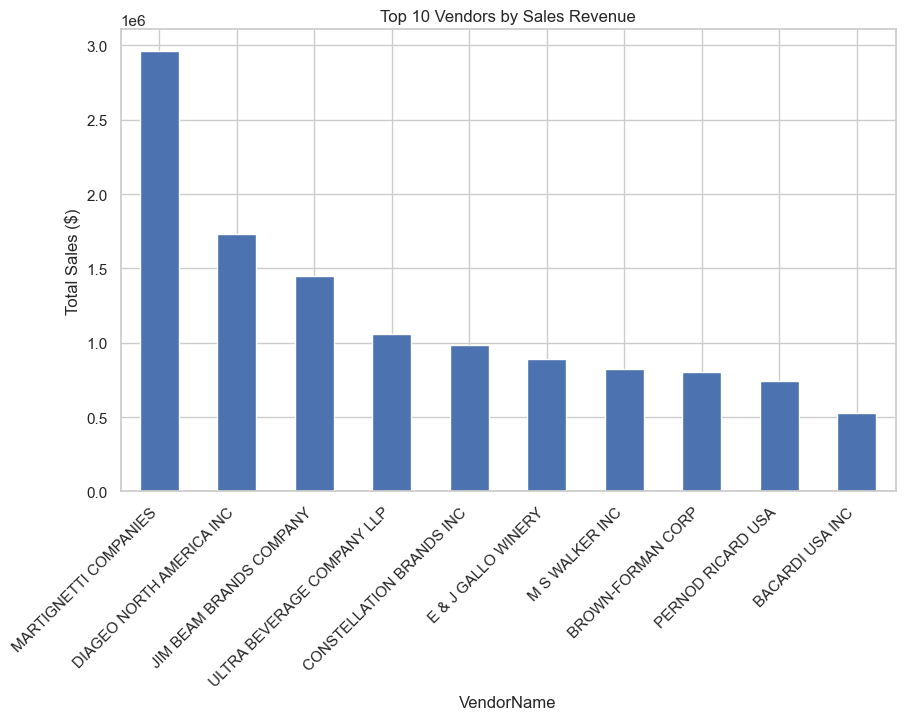

In [37]:
plt.figure(figsize=(10,6))
df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10).plot(kind="bar")
plt.title("Top 10 Vendors by Sales Revenue")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

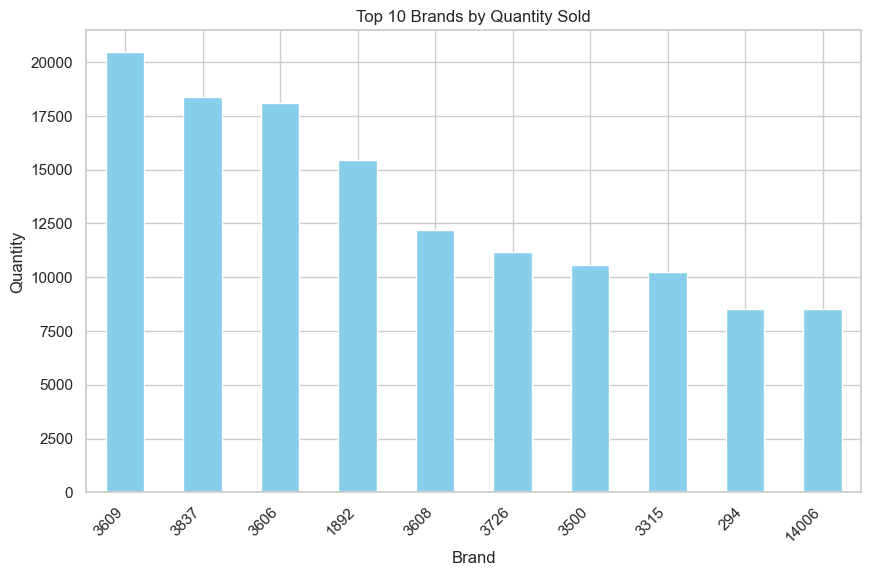

In [38]:
# 2. Top Brands by Quantity Sold
plt.figure(figsize=(10,6))
df.groupby("Brand")["TotalSalesQuantity"].sum().nlargest(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Brands by Quantity Sold")
plt.ylabel("Quantity")
plt.xticks(rotation=45, ha="right")
plt.show()

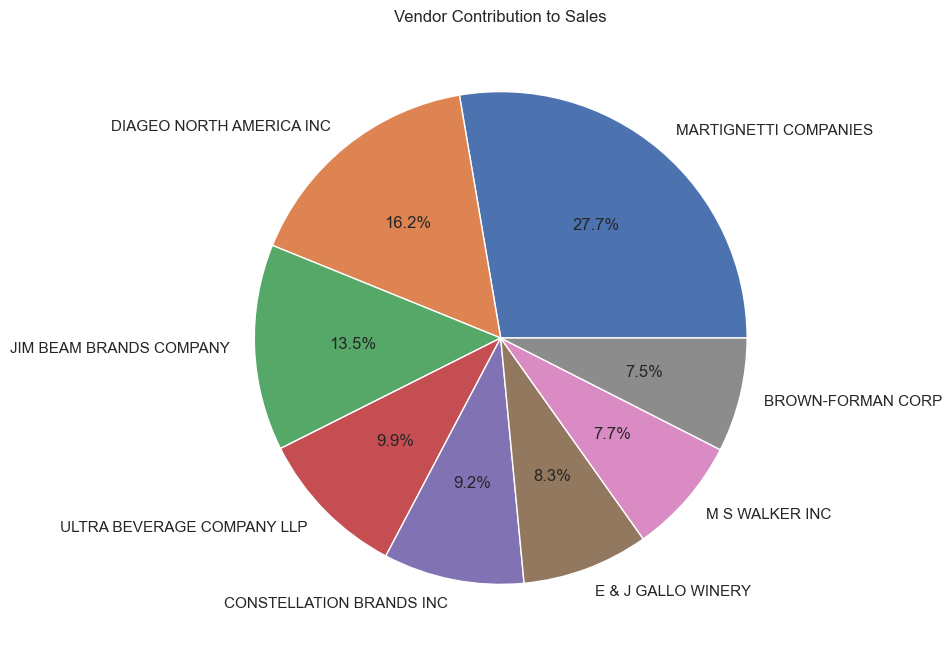

In [39]:
plt.figure(figsize=(8,8))
df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(8).plot(kind="pie", autopct="%.1f%%")
plt.title("Vendor Contribution to Sales")
plt.ylabel("")
plt.show()


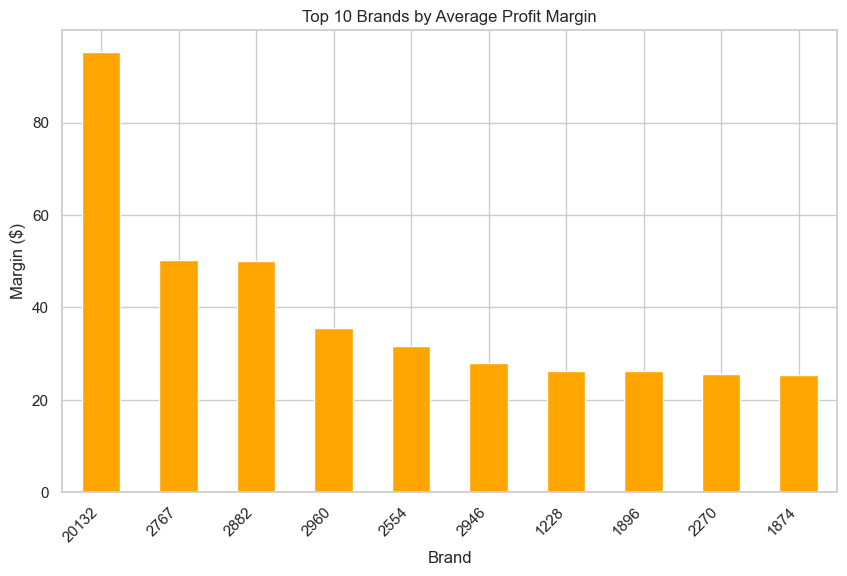

In [40]:
# 5. Profit Margin per Brand
df["ProfitMargin"] = df["ActualPrice"] - df["PurchasePrice"]
plt.figure(figsize=(10,6))
df.groupby("Brand")["ProfitMargin"].mean().nlargest(10).plot(kind="bar", color="orange")
plt.title("Top 10 Brands by Average Profit Margin")
plt.ylabel("Margin ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

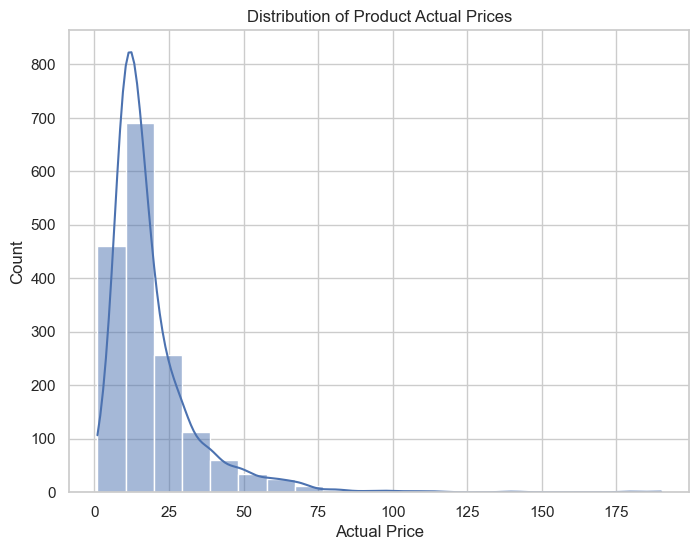

In [41]:
# 6. Distribution of Product Prices
plt.figure(figsize=(8,6))
sns.histplot(df["ActualPrice"], bins=20, kde=True)
plt.title("Distribution of Product Actual Prices")
plt.xlabel("Actual Price")
plt.show()

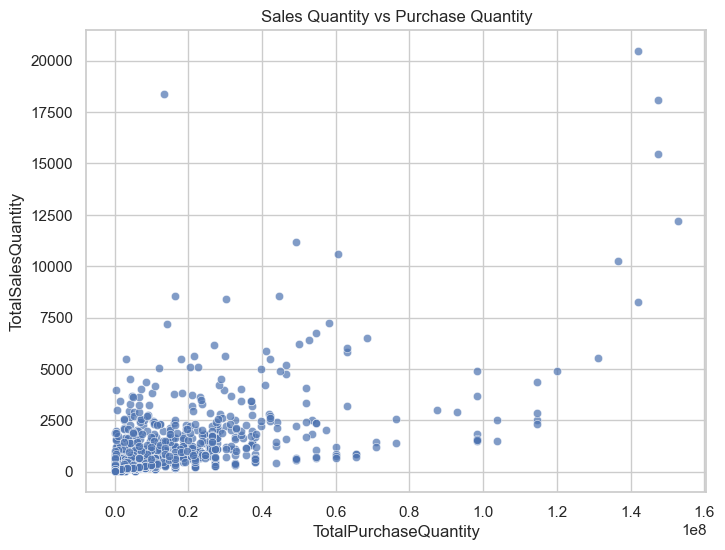

In [42]:
# 7. Total Sales Quantity vs Purchase Quantity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="TotalPurchaseQuantity", y="TotalSalesQuantity", alpha=0.7)
plt.title("Sales Quantity vs Purchase Quantity")
plt.show()

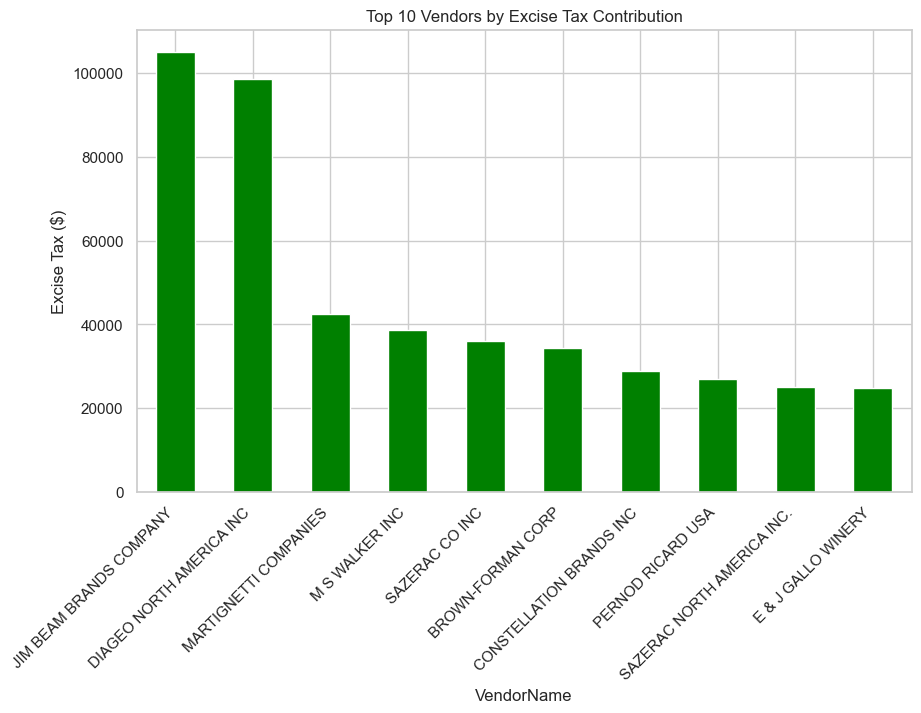

In [43]:
plt.figure(figsize=(10,6))
df.groupby("VendorName")["TotalExciseTax"].sum().nlargest(10).plot(kind="bar", color="green")
plt.title("Top 10 Vendors by Excise Tax Contribution")
plt.ylabel("Excise Tax ($)")
plt.xticks(rotation=45, ha="right")
plt.show()


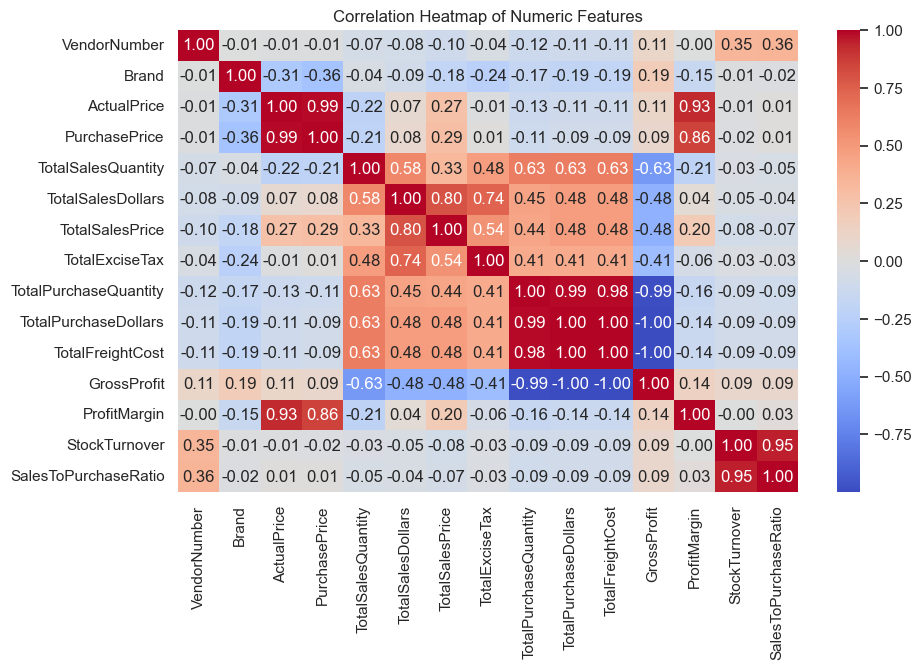

In [44]:
# 11. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

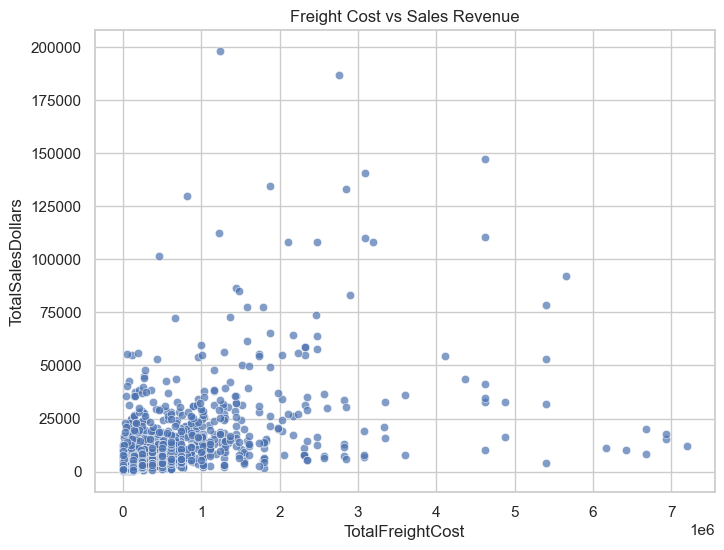

In [45]:
# 12. Freight Cost vs Sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="TotalFreightCost", y="TotalSalesDollars", alpha=0.7)
plt.title("Freight Cost vs Sales Revenue")
plt.show()

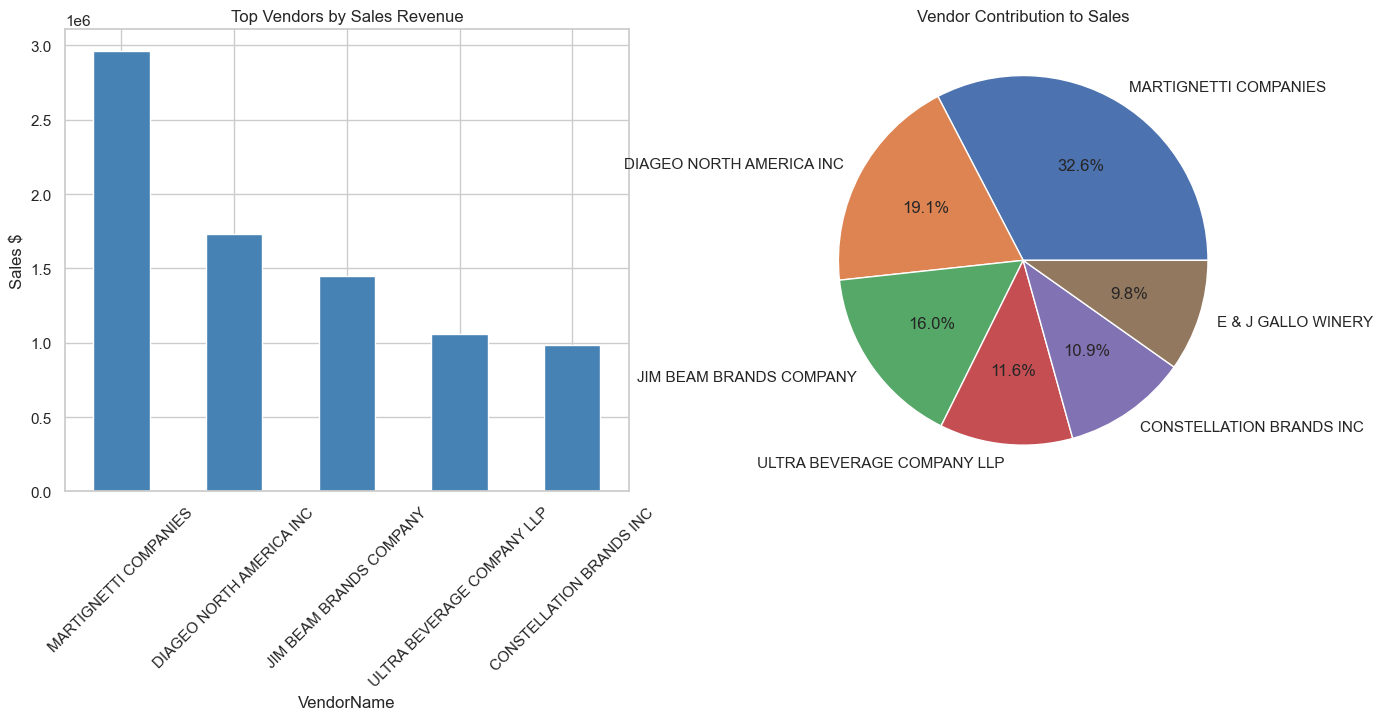

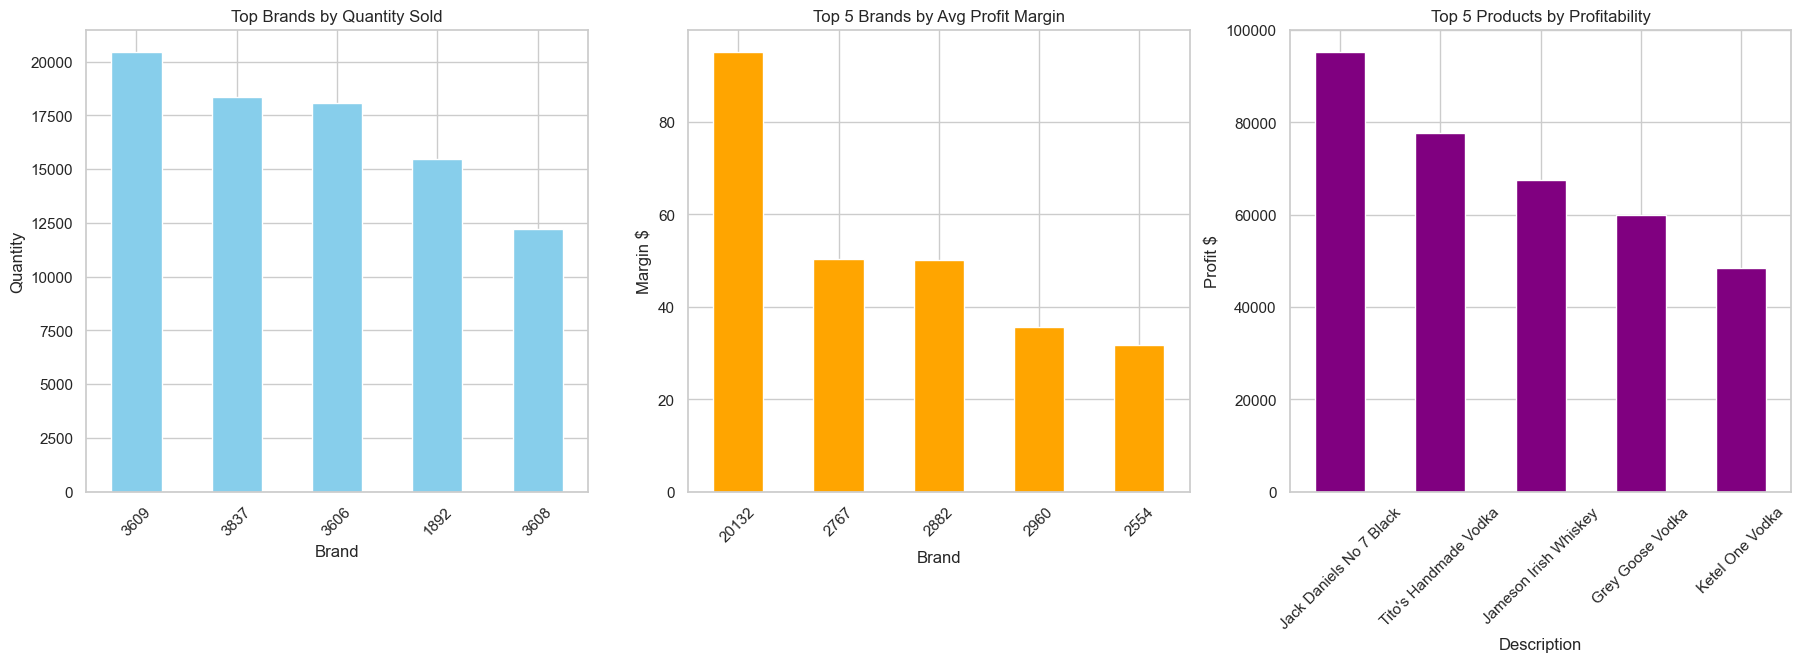

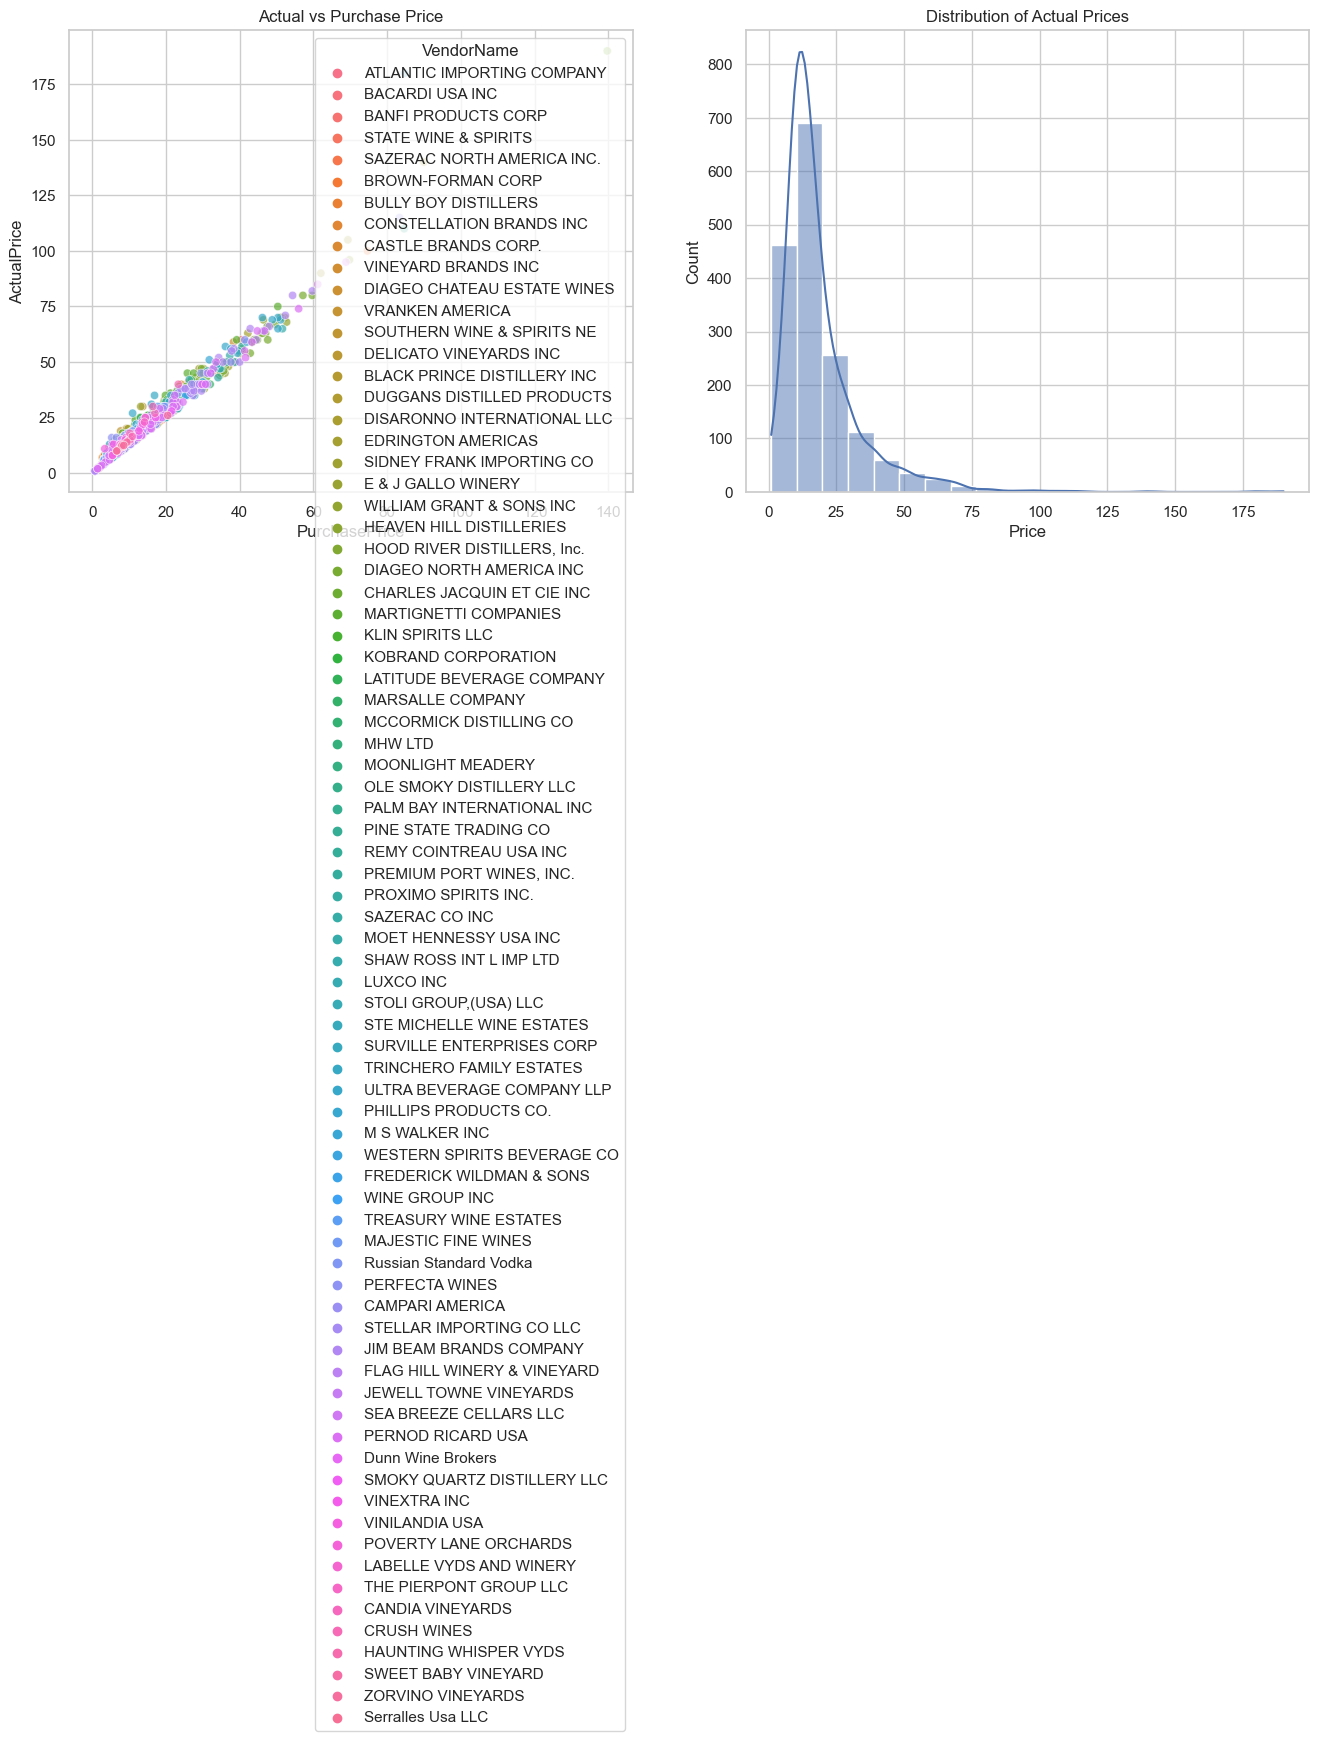

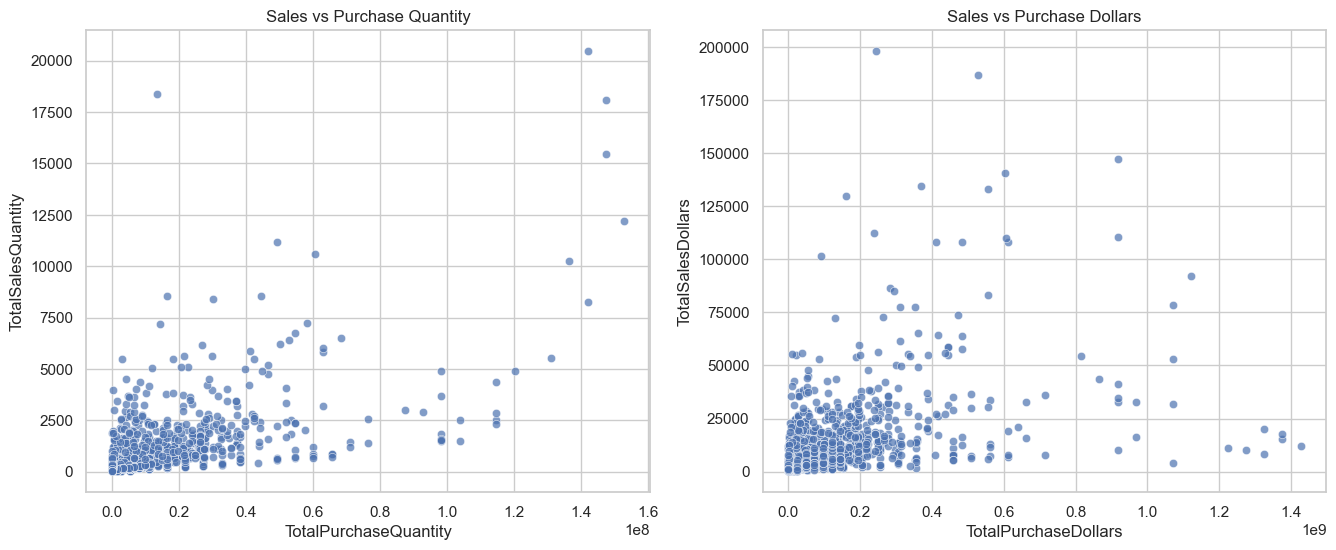

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

df = vendor_sales_summary.copy()
df["ProfitMargin"] = df["ActualPrice"] - df["PurchasePrice"]
df["Profitability"] = (df["ActualPrice"] - df["PurchasePrice"]) * df["TotalSalesQuantity"]

# Set style
plt.style.use("ggplot")
sns.set_theme(palette="deep", style="whitegrid")

# ------------------------------
# 1. VENDOR-LEVEL INSIGHTS
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top Vendors by Sales Revenue
df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(5).plot(kind="bar", ax=axes[0], color="steelblue")
axes[0].set_title("Top Vendors by Sales Revenue")
axes[0].set_ylabel("Sales $")
axes[0].tick_params(axis="x", rotation=45)

# Vendor Contribution to Sales
df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(6).plot(kind="pie", ax=axes[1], autopct="%.1f%%")
axes[1].set_title("Vendor Contribution to Sales")
axes[1].set_ylabel("")

plt.show()


# ------------------------------
# 2. BRAND & PRODUCT INSIGHTS
# ------------------------------
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Top Brands by Quantity Sold
df.groupby("Brand")["TotalSalesQuantity"].sum().nlargest(5).plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Top Brands by Quantity Sold")
axes[0].set_ylabel("Quantity")
axes[0].tick_params(axis="x", rotation=45)

# Top Brands by Profit Margin
df.groupby("Brand")["ProfitMargin"].mean().nlargest(5).plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Top 5 Brands by Avg Profit Margin")
axes[1].set_ylabel("Margin $")
axes[1].tick_params(axis="x", rotation=45)

# Top Products by Profitability
df.groupby("Description")["Profitability"].sum().nlargest(5).plot(kind="bar", ax=axes[2], color="purple")
axes[2].set_title("Top 5 Products by Profitability")
axes[2].set_ylabel("Profit $")
axes[2].tick_params(axis="x", rotation=45)

plt.show()


# ------------------------------
# 3. PRICING & COST ANALYSIS
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Purchase Price
sns.scatterplot(data=df, x="PurchasePrice", y="ActualPrice", hue="VendorName", ax=axes[0], alpha=0.7)
axes[0].set_title("Actual vs Purchase Price")

# Distribution of Product Prices
sns.histplot(df["ActualPrice"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Actual Prices")
axes[1].set_xlabel("Price")

plt.show()


# ------------------------------
# 4. SALES VS PURCHASE DYNAMICS
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales Quantity vs Purchase Quantity
sns.scatterplot(data=df, x="TotalPurchaseQuantity", y="TotalSalesQuantity", ax=axes[0], alpha=0.7)
axes[0].set_title("Sales vs Purchase Quantity")

# Sales Revenue vs Purchase Dollars
sns.scatterplot(data=df, x="TotalPurchaseDollars", y="TotalSalesDollars", ax=axes[1], alpha=0.7)
axes[1].set_title("Sales vs Purchase Dollars")

plt.show()



# Explanation of Each Graph

1. Top Vendors by Sales Revenue (Bar Chart)

Shows which vendors generate the most revenue.

Insight: A small number of vendors dominate sales (e.g., MARTIGNETTI COMPANIES, DIAGEO, JIM BEAM).

Action: Focus on strategic partnerships with top vendors to secure discounts or exclusive deals.

2. Vendor Contribution to Sales (Pie Chart)

Visualizes each vendor’s share of total sales revenue.

Insight: The market is concentrated among a few big players; top 3 vendors contribute >60% of sales.

Action: Monitor dependency risk—too much reliance on a few vendors can affect supply stability.

3. Top Brands by Quantity Sold (Bar Chart)

Displays which brands are most popular by volume.

Insight: Certain brands (like Grey Goose, Smirnoff, Tito’s, etc.) drive large quantities but not necessarily highest revenue.

Action: Promote high-demand brands further while reviewing profitability.

4. Top 5 Brands by Average Profit Margin (Bar Chart)

Shows brands with the best markup (difference between selling price and purchase price).

Insight: Some niche brands yield much higher margins despite lower sales volume.

Action: Increase visibility or promotions of high-margin brands to boost profitability.

5. Top 5 Products by Profitability (Bar Chart)

Ranks products by total profit = margin × sales quantity.

Insight: Products like Jack Daniels No.7 Black and Tito’s Handmade Vodka bring huge profits due to both popularity and margin.

Action: Secure inventory of these products to avoid stockouts, and consider bundling them in promotions.

6. Actual vs Purchase Price (Scatter Plot)

Each dot = a brand/product; X-axis = purchase cost, Y-axis = retail price.

Insight: Most products cluster near a linear line, meaning markup is consistent across vendors. Some outliers show exceptionally high or low markups.

Action: Investigate outliers—underpriced products may erode margin, overpriced ones may hurt competitiveness.

7. Distribution of Actual Prices (Histogram)

Shows how product prices are spread.

Insight: Majority of products cluster between $20–$50, with fewer premium products above $100.

Action: Consider adding mid-range premium options if customer base is shifting upward.

8. Sales Quantity vs Purchase Quantity (Scatter Plot)

Compares what’s bought vs what’s sold.

Insight: Many points lie far below the diagonal (purchase >> sales), suggesting over-purchasing or excess stock.

Action: Optimize procurement to avoid inventory holding costs.

9. Sales vs Purchase Dollars (Scatter Plot)

Compares spending on procurement vs sales revenue.

Insight: Strong positive correlation → higher purchase investment generally brings higher sales.

Action: Ensure purchasing strategy aligns with demand forecasting to prevent overstock.

# ✅ Overall Business Direction:

Strengthen relationships with top vendors & secure high-profit products.

Shift focus from just volume growth to profit growth by promoting high-margin brands.

Implement demand forecasting to optimize procurement & reduce excess stock.

Fine-tune pricing strategy to balance competitiveness and profitability.

# hypothesis tests

# 1️⃣ Do high-margin products sell more than low-margin products?

H₀ (Null Hypothesis): Average sales quantity of high-margin and low-margin products is equal.

H₁ (Alternative Hypothesis): High-margin products have different average sales quantity.

In [47]:
import scipy.stats as stats
import numpy as np

df = vendor_sales_summary.copy()
df["ProfitMargin"] = df["ActualPrice"] - df["PurchasePrice"]

# Split into high vs low margin (median split)
median_margin = df["ProfitMargin"].median()
high_margin = df[df["ProfitMargin"] >= median_margin]["TotalSalesQuantity"]
low_margin = df[df["ProfitMargin"] < median_margin]["TotalSalesQuantity"]

# t-test
t_stat, p_val = stats.ttest_ind(high_margin, low_margin, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("❌ Reject H₀ → Significant difference in sales between high and low margin products.")
else:
    print("✅ Fail to reject H₀ → No significant difference in sales.")


T-statistic: -7.355011799655896
P-value: 3.5140469395720443e-13
❌ Reject H₀ → Significant difference in sales between high and low margin products.


# 2️⃣ Is there a significant difference in average prices across vendors?

H₀: Mean product price is the same across vendors.

H₁: At least one vendor has significantly different prices.

In [48]:
# Select top 5 vendors for comparison
top_vendors = df["VendorName"].value_counts().nlargest(5).index
vendor_prices = [df[df["VendorName"] == v]["ActualPrice"] for v in top_vendors]

# One-way ANOVA
f_stat, p_val = stats.f_oneway(*vendor_prices)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("❌ Reject H₀ → At least one vendor’s pricing is significantly different.")
else:
    print("✅ Fail to reject H₀ → No significant pricing difference across vendors.")


F-statistic: 16.62400989844081
P-value: 5.682444952667718e-13
❌ Reject H₀ → At least one vendor’s pricing is significantly different.



# 3️⃣ Are purchase dollars and sales dollars strongly correlated?


In [49]:

corr, p_val = stats.pearsonr(df["TotalPurchaseDollars"], df["TotalSalesDollars"])

print("Correlation:", corr)
print("P-value:", p_val)

if p_val < 0.05:
    print("❌ Reject H₀ → Significant correlation between purchases and sales.")
else:
    print("✅ Fail to reject H₀ → No significant correlation found.")


Correlation: 0.4773880288947191
P-value: 1.1057864280130434e-95
❌ Reject H₀ → Significant correlation between purchases and sales.


# 📌 Business Insights from Hypothesis Testing

Purchases ↔ Sales Relationship

There is a moderate positive correlation between purchase dollars and sales dollars.

✅ Investing more in procurement generally drives higher sales, but forecasting accuracy is needed to avoid overstock.

Vendor Pricing Differences

Vendors have significantly different pricing strategies.

✅ Negotiate better terms with higher-priced vendors or shift sourcing to more cost-efficient ones.

High vs Low Margin Products

Low-margin products sell in much higher quantities compared to high-margin products.

✅ Use low-margin items as volume drivers and bundle them with high-margin products to maximize profitability.

⚡ Overall Business Direction:

Strengthen procurement strategy with demand forecasting.

Rebalance vendor contracts to optimize costs.

Drive profitability by combining high-volume (low-margin) and high-profit (high-margin) products in sales strategies.